# Step 1

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

## Read the  dataset

In [2]:
#Read dataset
df = pd.read_csv('./data/kddcup99.csv')

In [3]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [4]:
df.label.value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

### Preprocessing

In [5]:
s = (df.dtypes=='object')
object_cols = list(s[s].index)
object_cols #看看哪些列不是数值的

['protocol_type', 'service', 'flag', 'label']

In [6]:
df = df.drop(['protocol_type','service','flag'],axis=1)
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,181,5450,0,0,0,0,0,1,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,239,486,0,0,0,0,0,1,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,235,1337,0,0,0,0,0,1,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,219,1337,0,0,0,0,0,1,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,217,2032,0,0,0,0,0,1,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,310,1881,0,0,0,0,0,1,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,282,2286,0,0,0,0,0,1,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,203,1200,0,0,0,0,0,1,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,291,1200,0,0,0,0,0,1,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [7]:
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)

In [8]:
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.067792,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,-1.694320,0.599393,-0.282867,-1.022079,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal
1,-0.067792,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,-1.600016,0.599393,-0.282867,-1.146739,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal
2,-0.067792,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,-1.505712,0.599393,-0.282867,-1.188293,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal
3,-0.067792,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,-1.411409,0.599393,-0.282867,-1.188293,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal
4,-0.067792,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,-1.317105,0.599393,-0.282867,-1.209069,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,-0.067792,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,0.625555,0.599393,-0.282867,-1.229846,1.028091,-0.464418,-0.436950,-0.25204,-0.249464,normal
494016,-0.067792,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,0.625555,0.599393,-0.282867,-0.897419,1.028091,-0.464418,-0.436950,-0.25204,-0.249464,normal
494017,-0.067792,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,0.625555,0.599393,-0.282867,-1.125963,1.028091,-0.306769,-0.436950,-0.25204,-0.249464,normal
494018,-0.067792,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,0.625555,0.599393,-0.282867,-1.167516,1.028091,-0.359319,-0.436950,-0.25204,-0.249464,normal


### Data sampling
Due to the space limit of GitHub files and the large size of network traffic data, we sample a small-sized subset for model learning using **k-means cluster sampling**

In [9]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [10]:
df.label.value_counts()

18    280790
9     107201
11     97277
0       2203
17      1589
5       1247
15      1040
21      1020
20       979
14       264
10       231
3         53
1         30
6         21
22        20
4         12
16        10
7          9
2          8
8          7
13         4
12         3
19         2
Name: label, dtype: int64

In [11]:
X = df.drop(['label'],axis=1) 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [12]:
# use k-means to cluster the data samples and select a proportion of data from each cluster
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=1000, random_state=0).fit(X)

In [13]:
klabel=kmeans.labels_
df['klabel']=klabel

In [14]:
df['klabel'].value_counts()

54     193081
89      33368
71      26186
877      5194
172      1878
        ...  
976         9
311         8
273         8
222         4
625         3
Name: klabel, Length: 709, dtype: int64

In [15]:
cols = list(df)
cols.insert(40, cols.pop(cols.index('label')))
df = df.loc[:, cols]

In [16]:
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,klabel,label
0,-0.067792,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,0.599393,-0.282867,-1.022079,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,242,11
1,-0.067792,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,0.599393,-0.282867,-1.146739,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,242,11
2,-0.067792,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,0.599393,-0.282867,-1.188293,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,242,11
3,-0.067792,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,0.599393,-0.282867,-1.188293,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,242,11
4,-0.067792,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,0.599393,-0.282867,-1.209069,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,242,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,-0.067792,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,0.599393,-0.282867,-1.229846,1.028091,-0.464418,-0.436950,-0.25204,-0.249464,368,11
494016,-0.067792,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,0.599393,-0.282867,-0.897419,1.028091,-0.464418,-0.436950,-0.25204,-0.249464,282,11
494017,-0.067792,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,0.599393,-0.282867,-1.125963,1.028091,-0.306769,-0.436950,-0.25204,-0.249464,125,11
494018,-0.067792,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396994,-0.005679,...,0.599393,-0.282867,-1.167516,1.028091,-0.359319,-0.436950,-0.25204,-0.249464,125,11


In [17]:
def typicalSampling(group):
    name = group.name
    frac = 0.1
    return group.sample(frac=frac)

result = df.groupby(
    'klabel', group_keys=False
).apply(typicalSampling)

In [18]:
showValues = result['label'].value_counts()
showValues

18    28075
9     10720
11     9730
0       222
17      160
5       129
15      102
21      102
20       99
14       26
10       24
3         5
7         3
6         2
2         2
4         1
16        1
1         1
Name: label, dtype: int64

In [19]:
# 筛选并删除只有一个的聚类
delete_values = np.where(showValues==1,showValues.index,-1)
delete_values = np.unique(delete_values).tolist()
del delete_values[0]
print(delete_values)

[1, 4, 16]


In [20]:
result = result[~result['label'].isin(delete_values)]
result.iloc[:,-1] = labelencoder.fit_transform(result.iloc[:, -1])
result['label'].value_counts()

12    28075
6     10720
8      9730
0       222
11      160
3       129
14      102
10      102
13       99
9        26
7        24
2         5
5         3
4         2
1         2
Name: label, dtype: int64

In [21]:
result = result.drop(['klabel'],axis=1)

In [22]:
result.to_csv('./data/cnn_sample_km.csv',index=0)

### split train set and test set

In [23]:
df=pd.read_csv('./data/cnn_sample_km.csv')

In [24]:
X = df.drop(['label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

## Feature engineering

### Feature selection by information gain

In [26]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)

In [27]:
#将importance中的数据四舍五入到第四位小数， 压缩打包 reverse=True降序排序
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
#f_list[i][0] 数值 f_list[i][1] 列名 
for i in range(0, len(f_list)): 
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [28]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.5:
        break        

In [29]:
X_fs = df[fs].values

In [30]:
X_fs.shape

(49401, 7)

### Feature selection by Fast Correlation Based Filter (FCBF)

In [31]:
from FCBF_Module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [32]:
X_fss = fcbf.fit_transform(X_fs,y)

In [33]:
X_fss.shape

(49401, 7)

### Re-split train & test sets after feature selection

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_fss,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [35]:
X_train.shape

(39520, 7)

In [36]:
minority = pd.Series(y_train).value_counts()
minority

12    22459
6      8576
8      7784
0       177
11      128
3       103
14       82
10       82
13       79
9        21
7        19
2         4
4         2
1         2
5         2
dtype: int64

### SMOTE to solve class-imbalance

In [37]:
# 把不足1000个的聚类平衡成1000
smote_values = np.where(minority<1000,minority.index,-1)
smote_values = np.unique(smote_values).tolist()
del smote_values[0]
print(smote_values) #不足的的索引

[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 13, 14]


In [38]:
# 转为参数里的形式
strategy = {}
for i in smote_values:
    item = {i:1000}
    strategy.update(item)
print(strategy)

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 7: 1000, 9: 1000, 10: 1000, 11: 1000, 13: 1000, 14: 1000}


In [39]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy=strategy,k_neighbors=1)
X_train, y_train = smote.fit_resample(X_train, y_train)
pd.Series(y_train).value_counts()

12    22459
6      8576
8      7784
13     1000
11     1000
0      1000
3      1000
14     1000
10     1000
2      1000
7      1000
9      1000
4      1000
1      1000
5      1000
dtype: int64

In [40]:
X_train = pd.DataFrame(X_train)
X_train.insert(loc=len(X_train.columns), column='label', value=y_train)
df = X_train

## Data Transformation
Convert tabular data to images
Procedures:
1. Use quantile transform to transform the original data samples into the scale of [0,255], representing pixel values
2. Generate images for each category (Normal, DoS, Fuzzy, Gear, RPM), each image consists of 27 data samples with 9 features. Thus, the size of each image is 9*9*3, length 9, width 9, and 3 color channels (RGB).

In [41]:
# Transform all features into the scale of [0,1]
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer() 
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [42]:
# Multiply the feature values by 255 to transform them into the scale of [0,255]
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [43]:
df.describe()

,0,1,2,3,4,5,6,label
count,50819.000000,50819.000000,50819.000000,50819.000000,50819.000000,50819.000000,50819.000000,50819.000000
mean,158.602879,118.732438,71.079613,183.926274,144.686531,165.717315,143.785965,127.506201
std,112.083100,83.269613,101.392996,101.813892,91.673408,101.524216,91.058459,70.230482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,63.813814,63.558559,63.768283,64.196697,51.561562
50%,255.000000,134.009009,0.000000,255.000000,127.500000,255.000000,126.606607,129.797297
75%,255.000000,194.121622,190.292793,255.000000,255.000000,255.000000,255.000000,188.633634
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


All features are in the same scale of [0,255]

In [44]:
label_col = 'label'
dfs = [df[df[label_col]==tmp].drop([label_col],axis=1) for tmp in df[label_col].value_counts().index]

In [46]:
# Generate images for each class

# Generate 9*9 color images for every class
# Change the numbers 9 to the number of features n in your dataset if you use a different dataset, reshape(n,n,3)
# In this case the n = 40
n = len(df.columns)-1
for i in range(len(dfs)):
    tmp_df = dfs[i]
    count=0
    ims = []

    image_path = "train/{}/".format(i)
    os.makedirs(image_path)

    for i in range(0, len(tmp_df)):  
        count += 1
        if count<=n*3: 
            im=tmp_df.iloc[i].values
            ims=np.append(ims,im)
        else:
            ims=np.array(ims).reshape(n,n,3)
            array = np.array(ims, dtype=np.uint8)
            new_image = Image.fromarray(array)
            new_image.save(image_path+str(i)+'.png')
            count=1 # Fix bug
            ims = tmp_df.iloc[i].values # Fix bug

### Display samples for each category

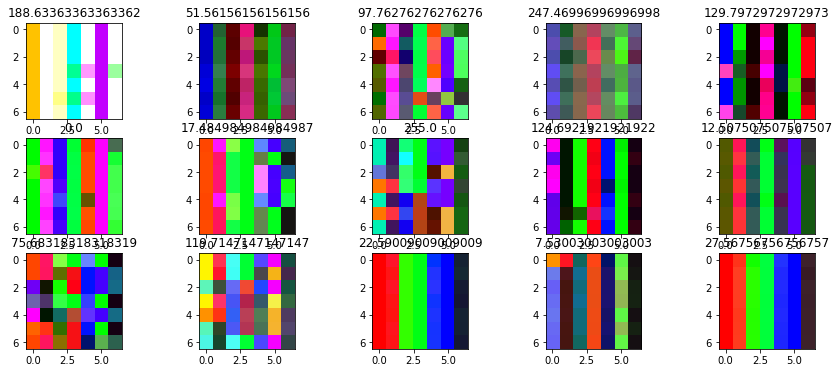

In [48]:
imgs = list()
Train_Dir='./train/'
for dir in os.listdir(Train_Dir):
    img_files = os.listdir(os.path.join(Train_Dir, dir))
    if len(img_files) != 0: imgs.append(Image.open(os.path.join(Train_Dir, dir, img_files[0])))
titles = df[label_col].value_counts().index.to_list()

plt.figure(figsize=(15, 6)) 
for i in range(len(imgs)):
    plt.subplot(3, 5, i+1)
    plt.imshow(imgs[i])
    plt.title(titles[i])
plt.show()  # display it

## Split the training and test set 

In [49]:
# Create folders to store images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

2411


In [50]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)//5 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)    
        if not os.path.exists(fpath):
            os.makedirs(fpath)               
        shutil.move(srcfile,dstfile)          
        #print ("move %s -> %s"%(srcfile,dstfile))

In [51]:
# The size of test set
Numbers

482

In [52]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [53]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [54]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [55]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing
